In [ ]:
import tensorflow as tf
from scipy.io import loadmat

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the dataset from your Drive folder

train = loadmat('gdrive/MyDrive/train_32x32.mat')
test = loadmat('gdrive/MyDrive/test_32x32.mat')

1. Examining and preprocessing the dataset

In [ ]:
import numpy as np
from tensorflow import keras
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import random
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization

In [ ]:
x_train = train['X']
y_train = train['y']
x_test = test['X']
y_test = test['y']

In [ ]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [ ]:
x_train = np.moveaxis(x_train, 3, 0)
x_test = np.moveaxis(x_test, 3, 0)

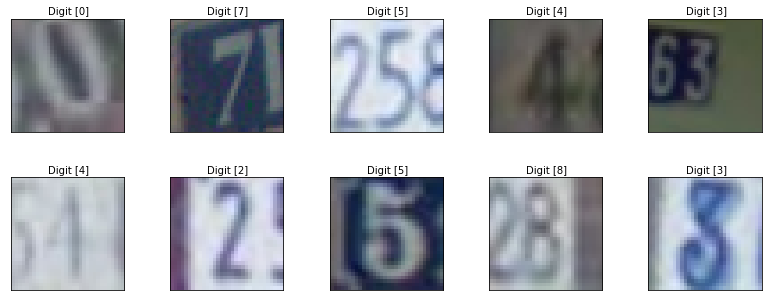

In [ ]:
num_train_images = x_train.shape[0]
random_inx = np.random.choice(num_train_images, 10)
random_train_images = x_train[random_inx, ...]
random_train_labels = y_train[random_inx, ...]
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (image, label) in enumerate(zip(random_train_images,random_train_labels)):
  axes[i%2, i%5].imshow(np.squeeze(image))
  axes[i%2, i%5].get_xaxis().set_visible(False)
  axes[i%2, i%5].get_yaxis().set_visible(False)
  axes[i%2, i%5].text(10., -1.5, f'Digit {label}')
plt.show()

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

In [ ]:
x_train = np.average(x_train, axis=3)
x_test = np.average(x_test, axis=3)

In [ ]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

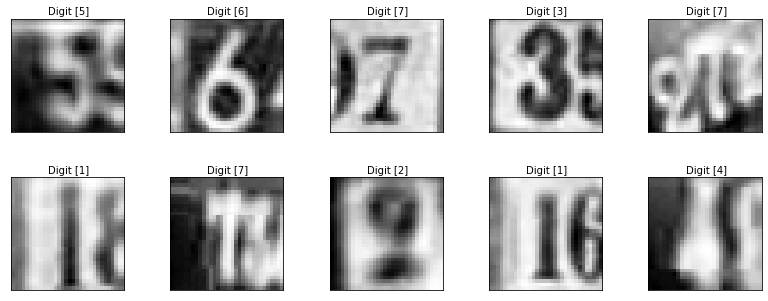

In [ ]:
num_train_images = x_train.shape[0]
random_inx = np.random.choice(num_train_images, 10)
random_train_images = x_train[random_inx, ...]
random_train_labels = y_train[random_inx, ...]
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (image, label) in enumerate(zip(random_train_images,random_train_labels)):
  axes[i%2, i%5].imshow(np.squeeze(image), cmap="Greys")
  axes[i%2, i%5].get_xaxis().set_visible(False)
  axes[i%2, i%5].get_yaxis().set_visible(False)
  axes[i%2, i%5].text(10., -1.5, f'Digit {label}')
plt.show()


2. MLP neural network classifier

In [ ]:
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train[0].shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11,activation="softmax")
])

In [ ]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 11)                715       
Total params: 599,435
Trainable params: 599,435
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mlp.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [ ]:
checkpoint_path = 'checkpoints_best_only_MLP'
checkpoint_best_only = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_sparse_categorical_accuracy', save_best_only=True,save_weights_only=True, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
callbacks = [checkpoint_best_only, early_stopping]

In [ ]:
history = model_mlp.fit(x_train, y_train, validation_split=0.15, epochs=20,batch_size=256, callbacks=callbacks)


Epoch 1/20
244/244 [==============================] - 8s 28ms/step - loss: 2.2462 - accuracy: 0.1858 - val_loss: 2.1675 - val_accuracy: 0.2383
Epoch 2/20
244/244 [==============================] - 5s 19ms/step - loss: 1.9683 - accuracy: 0.3070 - val_loss: 1.6514 - val_accuracy: 0.4367
Epoch 3/20
244/244 [==============================] - 5s 19ms/step - loss: 1.4628 - accuracy: 0.5124 - val_loss: 1.2892 - val_accuracy: 0.5789
Epoch 4/20
244/244 [==============================] - 5s 19ms/step - loss: 1.2184 - accuracy: 0.6113 - val_loss: 1.1747 - val_accuracy: 0.6254
Epoch 5/20
244/244 [==============================] - 5s 19ms/step - loss: 1.0965 - accuracy: 0.6562 - val_loss: 1.1176 - val_accuracy: 0.6420
Epoch 6/20
244/244 [==============================] - 5s 20ms/step - loss: 1.0225 - accuracy: 0.6842 - val_loss: 1.0553 - val_accuracy: 0.6634
Epoch 7/20
244/244 [==============================] - 5s 19ms/step - loss: 0.9834 - accuracy: 0.6955 - val_loss: 0.9434 - val_accuracy: 0.7084

In [ ]:
history = model_mlp.history

Accuracy repeat rate of machine learning


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


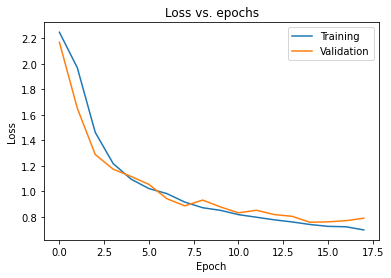

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='up right')
plt.show()

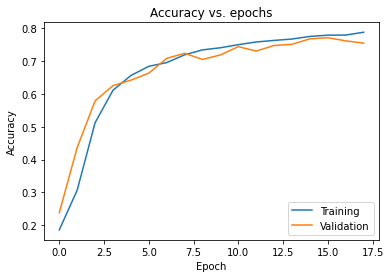

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model_mlp.evaluate(x_test, y_test)

814/814 [==============================] - 2s 3ms/step - loss: 0.8582 - accuracy: 0.7440


[0.8582465648651123, 0.7440073490142822]

3. CNN neural network classifier

In [ ]:
model = tf.keras.Sequential([
                          keras.layers.Dense(16,input_shape=x_train[0].shape),
                          keras.layers.Dense(16,activation="relu"),
                          keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"),
                          keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Dropout(0.2),
                          keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"),
                          keras.layers.BatchNormalization(),
                          keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"),
                          keras.layers.MaxPool2D((2,2),padding="same"),
                          keras.layers.Dense(16,activation="relu"),
                          keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"),
                          keras.layers.MaxPool2D((2,2),padding="same"),
                          keras.layers.Flatten(),
                          keras.layers.Dense(11,activation="softmax"),
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32, 32, 16)        32        
_________________________________________________________________
dense_13 (Dense)             (None, 32, 32, 16)        272       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 16)       

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [ ]:
checkpoint_path = 'checkpoints_best_only_CNN'
checkpoint_best_only = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_sparse_categorical_accuracy', save_best_only=True,save_weights_only=True, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
callbacks = [checkpoint_best_only, early_stopping]

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.50, epochs=20,batch_size=256, callbacks=callbacks)

Epoch 1/30
144/144 [==============================] - 109s 758ms/step - loss: 1.9896 - accuracy: 0.2978 - val_loss: 2.0132 - val_accuracy: 0.5653
Epoch 2/30
144/144 [==============================] - 108s 753ms/step - loss: 0.9510 - accuracy: 0.7009 - val_loss: 1.2628 - val_accuracy: 0.7607
Epoch 3/30
144/144 [==============================] - 109s 755ms/step - loss: 0.7199 - accuracy: 0.7772 - val_loss: 0.8221 - val_accuracy: 0.7952
Epoch 4/30
144/144 [==============================] - 108s 753ms/step - loss: 0.6263 - accuracy: 0.8083 - val_loss: 0.6158 - val_accuracy: 0.8186
Epoch 5/30
144/144 [==============================] - 108s 752ms/step - loss: 0.5799 - accuracy: 0.8229 - val_loss: 0.5786 - val_accuracy: 0.8255
Epoch 6/30
144/144 [==============================] - 114s 795ms/step - loss: 0.5545 - accuracy: 0.8315 - val_loss: 0.5447 - val_accuracy: 0.8369
Epoch 7/30
144/144 [==============================] - 112s 781ms/step - loss: 0.5240 - accuracy: 0.8408 - val_loss: 0.5322 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<function matplotlib.pyplot.show>

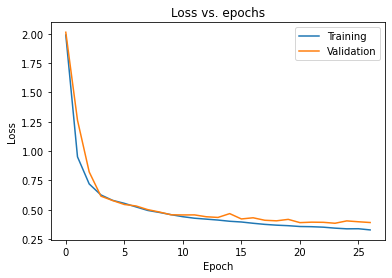

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='up right')
plt.show

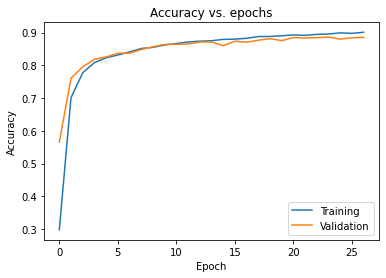

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

814/814 [==============================] - 19s 23ms/step - loss: 0.4061 - accuracy: 0.8839


[0.4061020016670227, 0.8839120864868164]

4. Get model predictions

In [ ]:
best_MLP_model = model_mlp

best_CNN_model = model


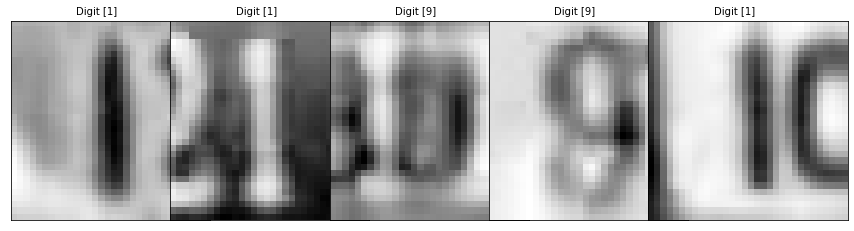

In [ ]:
num_test_images = x_test.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (image, label) in enumerate(zip(random_test_images, random_test_labels)):
  ax[i].imshow(np.squeeze(image), cmap="Greys")
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)
  ax[i].text(10., -1.5, f'Digit {label}')
plt.show()


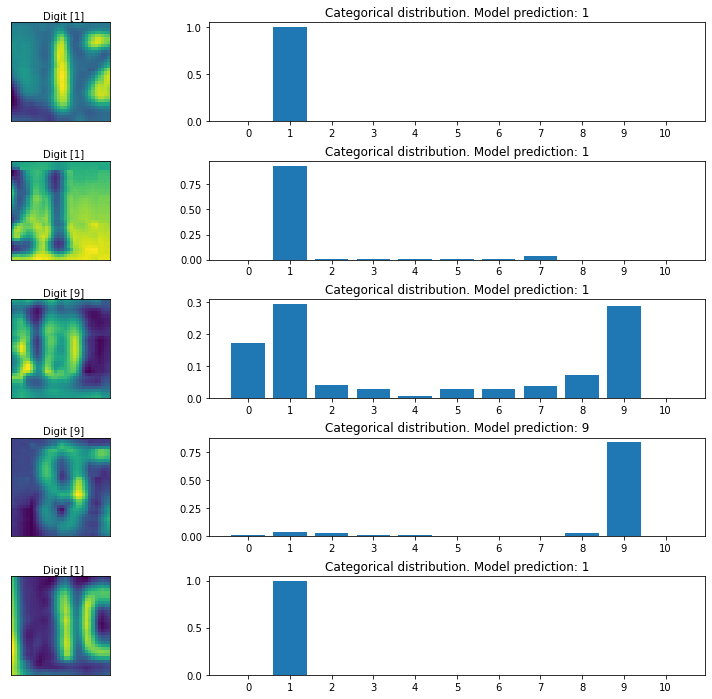

In [ ]:
predictions = best_MLP_model.predict(random_test_images)
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions,random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
plt.show()


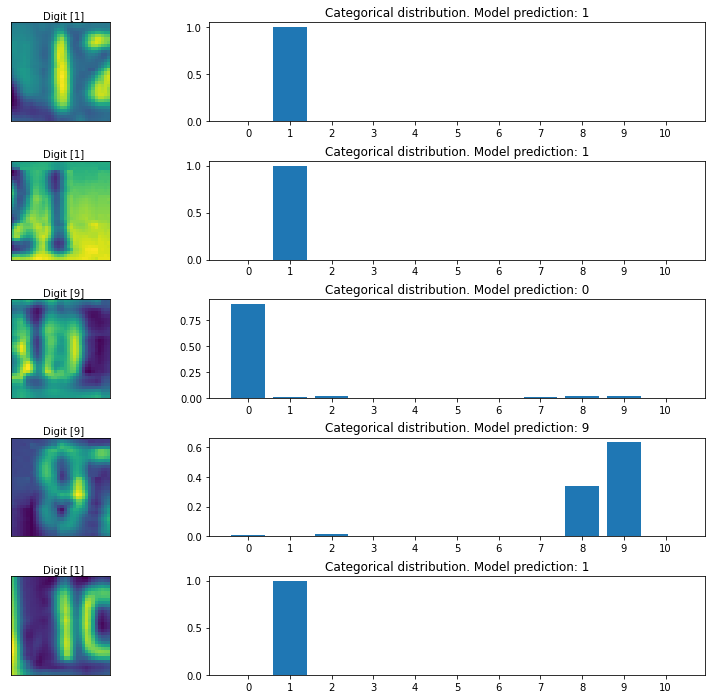

In [ ]:
predictions = best_CNN_model.predict(random_test_images)
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
for i, (prediction, image, label) in enumerate(zip(predictions,random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Digit {label}')
  axes[i, 1].bar(np.arange(len(prediction)), prediction)
  axes[i, 1].set_xticks(np.arange(len(prediction)))
  axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
plt.show()
